<a target="_blank" href="https://colab.research.google.com/github/davalpez/MyKaggle/blob/MyKaggle/Featured_Projects/FoodClassification/Multiclass_Food_part1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Food classification with Transfer Learning.


Just at the end of our CNN notebook, we were mentioning that we can use transfer learning to set up neural networks that have been trained previously to build a more effective network for ourselves to achieve more efficient solutions against the problem we are solving with out model.

Traning the model we found the most efficient after couple of experiment took 15 minutes for 50 epoch ( 3.33 epoch/min). If we wanted to train it for 600 epochs, what could be the amount that sometimes we see in the papers when they train and test the models that have been presented, it can take beyond 3 hours.

Loading previous models that we have trained ourselves is a good way to save time if we are trying to solve similar problems. Using pre-existing trained models avilable that have been more extensively trained for similar purposes is a good way, sometimes even better, to tackle the amount of time needed to solve our problem.

Let's start by loading back the food dataset and loading the model we did on TF-CNN as well. 

## Loading the dataset

We were working last time with the Food-101 dataset. We choose only 11 classes from this dataset and divided into different train and test folder so we could manipulate easier the data in it, facilitating the class separation and the labels when [calling image_dataset_from_director](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [15]:
import os

for dirpath, dirnames, filenames in os.walk("../Sources/Food-101-11"):
  print(f" {len(dirnames)} Directories and {len(filenames)} images in '{dirpath}'.")

 2 Directories and 0 images in '../Sources/Food-101-11'.
 11 Directories and 0 images in '../Sources/Food-101-11/test'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/hamburger'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/pancakes'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/oysters'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/risotto'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/tuna_tartare'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/tiramisu'.
 0 Directories and 600 images in '../Sources/Food-101-11/test/sushi'.
 0 Directories and 600 images in '../Sources/Food-101-11/test/steak'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/tacos'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/waffles'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/takoyaki'.
 11 Directories and 0 images in '../Sources/Food-101-11/train'.
 0 Directories and 7

In [1]:
# Import tensorflow and confirm the GPU availability.
import tensorflow as tf
tf.config.set_soft_device_placement(True)
print(tf.config.list_physical_devices('GPU'))

2025-02-17 14:41:50.275402: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739796110.433387     673 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739796110.479802     673 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 14:41:50.899963: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Define directory path
training_11_dir= "../Sources/Food-101-11/train"
testing_11_dir = "../Sources/Food-101-11/test"

In [3]:
# Create datasets
train_11_dataset = tf.keras.preprocessing.image_dataset_from_directory(training_11_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224),# resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

test_11_dataset = tf.keras.preprocessing.image_dataset_from_directory(testing_11_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224), # resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

Found 7700 files belonging to 11 classes.


I0000 00:00:1739796118.413895     673 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


Found 3300 files belonging to 11 classes.


In [4]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np

data_dir = pathlib.Path(training_11_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['hamburger' 'oysters' 'pancakes' 'risotto' 'steak' 'sushi' 'tacos'
 'takoyaki' 'tiramisu' 'tuna_tartare' 'waffles']


## Importing our model

As we have done before, we can retrieve and load the model we trained in our last session, which will save us a great amount of time if we want to re-test o re-train to improve out classification task.

In [5]:
# Import tensorflow and confirm the GPU availability.
import tensorflow as tf
tf.config.set_soft_device_placement(True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
model_50e_mixaug =tf.keras.models.load_model("saved_models/50e-11class-mixaug.keras")

In [7]:
model_50e_mixaug.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_3 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_3               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1_1 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1_1 (Activation)           │ (None, 222, 222, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1_2 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1_2 (Activation)           │ (None, 220, 220, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling2D)       │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2_1 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2_1 (Activation)           │ (None, 108, 108, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2_2 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2_2 (Activation)           │ (None, 106, 106, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 112360)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 11)             │     1,235,971 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,716,945 (14.18 MB)

 Trainable params: 1,238,981 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,477,964 (9.45 MB)

Perfect! we can confirm this was or model. We can also retrieve the prediction function we were using in our TF-CNN. We will load some older functions by importing them from modelgraph.py, a library file we will use to call old functions we have been using so far.

In [8]:
import sys
import os

sys.path.append(os.path.abspath("../lib"))

In [201]:
import importlib
import modelgraph  # Import the module
importlib.reload(modelgraph)  # Reload it after changes

<module 'modelgraph' from '/home/david/VSpython/Git/lib/modelgraph.py'>

I0000 00:00:1739796122.443183     860 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


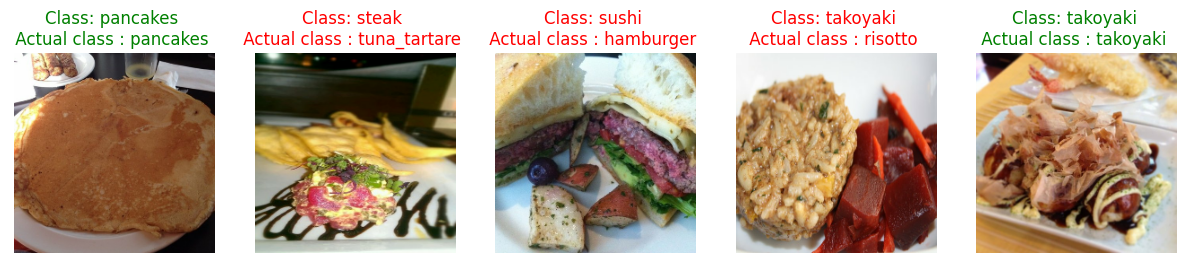

2025-02-17 14:42:03.885011: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
modelgraph.DisplayModelPredictions(model_50e_mixaug,train_11_dataset,class_names)

## Preparing a network for transfer learning

First thing we need is to have installed tensorflow_hub in our library so we can fetch the models from the official kaggle repository. The second step is to choose what kind of model we want to retrieve to use in our experiments.

As we are dealing at the moment with an image classification problem, [efficientnet-v2 by google](https://www.kaggle.com/models/google/efficientnet-v2/) is the model we will test for this chapter of this notebook.

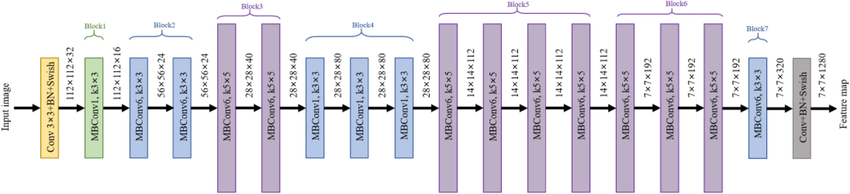

*Efficientnet structrue layout*

When we do transfer learning, we use a pre-built model that has the weight trained for detecting different characteristics or features from an image (in our image classification case), while we add at the end some extra layers to tune the new output.

The model is pretrained for image recognision, so when we introduce a new dataset, the output layer will change as we will expect different type and number of classes compared to what the original model was trained for.


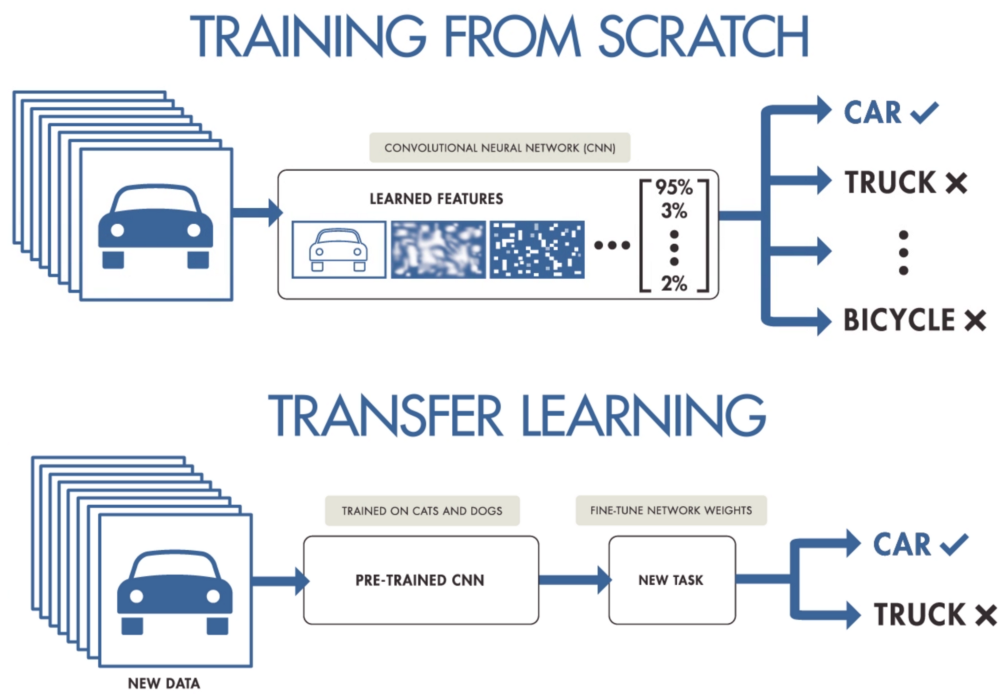

As we will have more powerfull model, let's also try to have a lighter version of the 11 class dataset to train the new model and see the difference in the perfomance.

In [11]:
# Define directory path
training_light_dir= "../Sources/Food-101-11-light/train"

In [12]:
for dirpath, dirnames, filenames in os.walk(training_light_dir):
  print(f" {len(dirnames)} Directories and {len(filenames)} images in '{dirpath}'.")

 11 Directories and 0 images in '../Sources/Food-101-11-light/train'.
 0 Directories and 77 images in '../Sources/Food-101-11-light/train/hamburger'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/pancakes'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/oysters'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/risotto'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/tuna_tartare'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/tiramisu'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/sushi'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/steak'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/tacos'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/waffles'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/takoyaki'.


In [13]:
# Create datasets
train_light_dataset = tf.keras.preprocessing.image_dataset_from_directory(training_light_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224),# resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)


Found 825 files belonging to 11 classes.


In [14]:
# Load tensorflow hub and layers to build the new TL model
# Load tf_keras as tensorflow hub has some compatibility problems
# with tensorflow.keras
import tensorflow_hub as hub
import tf_keras as keras

In [15]:
# Load the path for the model we want.
efficientnet_b0_fv_path = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-feature-vector/2"

As we have faced some problems with mismatched versions, let's recap here what versions are we using. TF Hub can have some issues with Tensorflow when it comes to loading a model from Kaggle as a keras layer.

In [50]:
version_fn = getattr(tf.keras, "version", None)
print("TF Version: " + tf.__version__)
print("TF Keras Version: " + version_fn())
print("TF Hub version " + hub.__version__)

TF Version: 2.18.0
TF Keras Version: 3.8.0
TF Hub version 0.16.1


The procedure goes as following:

1. We create a keras layer that is a copy of the whole model we are aiming to use for our classification problem. We define if we want the weights to be modified from the core model with the parameter trainable ( which for us, we are not interested. We will only add and modify some layers added at the end).

2. We add this layer to a sequential model, and then add a dense layer with a softmax activation layer as our new output layer for creating probabilities for our specific problem.

In [51]:
efficientnet_b0_layer = hub.KerasLayer(efficientnet_b0_fv_path,
                   trainable=False,
                   name="efficientnet_model",
                   input_shape=(224, 224, 3))


Now we create the base model which will contain our efficientnet layer, which is actually a model we will introduce into another model.

In [52]:
efficientnet_b0_model = keras.Sequential()

In [53]:
efficientnet_b0_model.add(efficientnet_b0_layer)

Let's see if the model was successfully added by checking its parameters.

In [54]:
efficientnet_b0_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet_model (KerasL  (None, 1280)              5919312   
 ayer)                                                           
                                                                 
Total params: 5919312 (22.58 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


We can see how our model holds from the layer that equals to the efficientnet model 5.919k parameters. Comparing to our model, efficientnet is almost 5 times larger.

We still need to add the last dense layer, so we will add it to our sequential model : 

In [55]:

efficientnet_b0_model.add(keras.layers.Dense(len(class_names), activation='softmax'))

Let's review again the composition of our model.

In [56]:
efficientnet_b0_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet_model (KerasL  (None, 1280)              5919312   
 ayer)                                                           
                                                                 
 dense_1 (Dense)             (None, 11)                14091     
                                                                 
Total params: 5933403 (22.63 MB)
Trainable params: 14091 (55.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [57]:

# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

Following the previous times we have built a model, we have 3 steps defyining steps : 

1. Create the model.
2. Build the model.
3. Compile the model.

So as we have completed the first step, let's continue with the two we have left :

In [58]:
# Notice due to the compatibility problems we were mentioning,
# we need to use the tf_keras library for our model, not the tensorflow library.
# 2. Compile the model
efficientnet_b0_model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])



In [59]:
# 3. Fit the model
efficientnet_b0_model_history = efficientnet_b0_model.fit(train_light_dataset, 
                                              epochs=5,
                                              steps_per_epoch=len(train_light_dataset),
                                              validation_data=test_11_dataset,
                                              validation_steps=len(test_11_dataset),
                                              callbacks=[create_tensorboard_callback(dir_name="kaggle_hub", 
                                                                                     experiment_name="efficientnet_b0")])

Saving TensorBoard log files to: kaggle_hub/efficientnet_b0/20250213-153508
Epoch 1/5


26/26 [==============================] - 20s 439ms/step - loss: 55.8436 - accuracy: 0.0970 - val_loss: 48.3514 - val_accuracy: 0.0979
Epoch 2/5
26/26 [==============================] - 8s 319ms/step - loss: 33.8968 - accuracy: 0.1394 - val_loss: 43.6056 - val_accuracy: 0.1070
Epoch 3/5
26/26 [==============================] - 8s 322ms/step - loss: 24.0953 - accuracy: 0.1976 - val_loss: 41.0047 - val_accuracy: 0.1045
Epoch 4/5
26/26 [==============================] - 10s 386ms/step - loss: 17.3141 - accuracy: 0.2545 - val_loss: 40.4404 - val_accuracy: 0.1070
Epoch 5/5
26/26 [==============================] - 10s 387ms/step - loss: 13.1999 - accuracy: 0.3115 - val_loss: 39.9421 - val_accuracy: 0.1145


Let's try to have another model to compare where we run the full training dataset.

In [60]:
# 1. Create the model

efficientnet_b0_model_2 = keras.Sequential()
efficientnet_b0_model_2.add(efficientnet_b0_layer)
efficientnet_b0_model_2.add(keras.layers.Dense(len(class_names), activation='softmax'))

# 2. Compile the model
efficientnet_b0_model_2.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
efficientnet_b0_model_2_history = efficientnet_b0_model_2.fit(train_11_dataset, 
                                              epochs=5,
                                              steps_per_epoch=len(train_11_dataset),
                                              validation_data=test_11_dataset,
                                              validation_steps=len(test_11_dataset),
                                              callbacks=[create_tensorboard_callback(dir_name="kaggle_hub", 
                                                                                     experiment_name="efficientnet_b0_2")])

Saving TensorBoard log files to: kaggle_hub/efficientnet_b0_2/20250213-153936
Epoch 1/5
241/241 [==============================] - 33s 122ms/step - loss: 41.4204 - accuracy: 0.1108 - val_loss: 33.2457 - val_accuracy: 0.1270
Epoch 2/5
241/241 [==============================] - 32s 134ms/step - loss: 26.0607 - accuracy: 0.1377 - val_loss: 29.1737 - val_accuracy: 0.1179
Epoch 3/5
241/241 [==============================] - 30s 126ms/step - loss: 20.2318 - accuracy: 0.1729 - val_loss: 27.5774 - val_accuracy: 0.1191
Epoch 4/5
241/241 [==============================] - 30s 124ms/step - loss: 17.0748 - accuracy: 0.1930 - val_loss: 25.6177 - val_accuracy: 0.1297
Epoch 5/5
241/241 [==============================] - 37s 154ms/step - loss: 15.1667 - accuracy: 0.2199 - val_loss: 25.2802 - val_accuracy: 0.1300


These results are not as good as we were expecting. The main problems we are experiencing here are :

1. **Low accuracy for a pretrained model**, where the base accuracy and validation accuracy are lower than the model we trained from zero. Both values should be higher for a pretrained model , so there is something that is not working as expected.

2. **Time consumption for training**, as training the last two layers for more than two minutes for 5 epochs is too large. Clearly we are missing GPU usage when using tf_keras.

Let's try another model now.

## Trying other models for Transfer Learning

In [14]:
# We define some static variables we will commonly use in this notebook.
IMAGE_SHAPE = (224,224,3)
BATCH_SIZE = 32

Let's also create a function to sped up and simplify the procedure we use to create new models from kaggle hub.

In [ ]:
def create_model(model_url, num_classes=11):
  """Introduce a model url and number of classes to return a fully created model for a local use.
  
  Args:
    model_url : url string from kaggle hub.
    num_classes : number of classes we want for our last layer.
  Returns:
    model: keras model that needs to be compiled and trained for the last layer.
  """
  # Load model into a keras layer replica.
  model_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='kaggle_model',
                                           input_shape=IMAGE_SHAPE)
  
  # Create our own model
  model = keras.Sequential([
    model_layer, # base model downloaded from kaggle.
    keras.layers.Dense(num_classes, activation='softmax', name='output_layer')   
  ])

  return model

Let's try with resnet now, and see the differences in accuracy.

In [63]:
resnet_v2_url = "https://kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/1"

Let's create and compile the model with our new function.

In [ ]:
# 1. Create model
resnet_model = create_model(resnet_v2_url, num_classes=11)

# 2. Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=keras.optimizers.Adam(),
                     metrics=['accuracy'])

Let's train the model with the original dataset and compare differences in training efficiency and accuracy.

In [66]:
# Fit the model
resnet_history = resnet_model.fit(train_11_dataset,
                                  epochs=5,
                                  steps_per_epoch=len(train_11_dataset),
                                  validation_data= test_11_dataset,
                                  validation_steps=len(test_11_dataset),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20250213-155511
Epoch 1/5
241/241 [==============================] - 48s 162ms/step - loss: 49.3985 - accuracy: 0.1649 - val_loss: 38.4645 - val_accuracy: 0.1652
Epoch 2/5
241/241 [==============================] - 44s 182ms/step - loss: 28.5612 - accuracy: 0.2017 - val_loss: 31.2480 - val_accuracy: 0.1942
Epoch 3/5
241/241 [==============================] - 112s 467ms/step - loss: 24.6161 - accuracy: 0.2264 - val_loss: 20.6019 - val_accuracy: 0.2333
Epoch 4/5
241/241 [==============================] - 151s 628ms/step - loss: 24.8196 - accuracy: 0.2366 - val_loss: 20.9502 - val_accuracy: 0.2542
Epoch 5/5
241/241 [==============================] - 189s 783ms/step - loss: 23.7772 - accuracy: 0.2410 - val_loss: 23.5577 - val_accuracy: 0.2330


As for now, we can see that training this model from tensorflow hub as it needs to use the specific tf_keras library is not optimal for local use.

Transfer learning has a big potential but creating and training our own models at this moment is faster and better.

In [69]:
resnet_model_2 = create_model(resnet_v2_url, num_classes=11)

# 2. Compile
resnet_model_2.compile(loss='categorical_crossentropy',
                     optimizer=keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [71]:
# Fit the model
resnet_history_2 = resnet_model_2.fit(train_light_dataset,
                                  epochs=5,
                                  steps_per_epoch=len(train_light_dataset),
                                  validation_data= test_11_dataset,
                                  validation_steps=len(test_11_dataset),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20250213-165927
Epoch 1/5


26/26 [==============================] - 19s 446ms/step - loss: 99.9263 - accuracy: 0.1224 - val_loss: 64.5620 - val_accuracy: 0.1018
Epoch 2/5
26/26 [==============================] - 10s 405ms/step - loss: 51.2682 - accuracy: 0.1552 - val_loss: 42.2080 - val_accuracy: 0.1258
Epoch 3/5
26/26 [==============================] - 13s 505ms/step - loss: 36.3857 - accuracy: 0.1527 - val_loss: 47.3118 - val_accuracy: 0.1270
Epoch 4/5
26/26 [==============================] - 12s 468ms/step - loss: 36.4622 - accuracy: 0.1794 - val_loss: 33.5810 - val_accuracy: 0.1536
Epoch 5/5
26/26 [==============================] - 12s 478ms/step - loss: 26.3486 - accuracy: 0.2048 - val_loss: 32.9546 - val_accuracy: 0.1467


In [72]:
resnet_model_3 = create_model(resnet_v2_url, num_classes=11)

# 2. Compile
resnet_model_3.compile(loss='categorical_crossentropy',
                     optimizer=keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit the model
resnet_history_3 = resnet_model_3.fit(train_light_dataset,
                                  epochs=10,
                                  steps_per_epoch=len(train_light_dataset),
                                  validation_data= test_11_dataset,
                                  validation_steps=len(test_11_dataset),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2_3")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2_3/20250213-170605
Epoch 1/10
26/26 [==============================] - 24s 562ms/step - loss: 105.8994 - accuracy: 0.1115 - val_loss: 66.2232 - val_accuracy: 0.1452
Epoch 2/10
26/26 [==============================] - 13s 506ms/step - loss: 52.0413 - accuracy: 0.1709 - val_loss: 44.0516 - val_accuracy: 0.1315
Epoch 3/10
26/26 [==============================] - 19s 754ms/step - loss: 38.4632 - accuracy: 0.1661 - val_loss: 42.2621 - val_accuracy: 0.1394
Epoch 4/10
26/26 [==============================] - 16s 645ms/step - loss: 35.7592 - accuracy: 0.1673 - val_loss: 35.7219 - val_accuracy: 0.1758
Epoch 5/10
26/26 [==============================] - 18s 703ms/step - loss: 32.1704 - accuracy: 0.2061 - val_loss: 36.8421 - val_accuracy: 0.1388
Epoch 6/10
26/26 [==============================] - 21s 837ms/step - loss: 31.1119 - accuracy: 0.2097 - val_loss: 34.1871 - val_accuracy: 0.1624
Epoch 7/10
26/26 [==============================] - 

As we can see, creating a model with transfer learning is not being optimal. This is due to some compatibility issues that we find with tensorflow_hub and tf_keras library. But there's a solution: Tensorflow library holds a function that can fetch itself the model from the repository. The difference we have now is that instead of building the model through the Sequential API, we do it through [the Functional API](https://www.tensorflow.org/api_docs/python/tf/keras/applications).

## Updated ! Transfer learning with Functional TF application.

There is another way to build our model, and that's by using other type of functions to create our model on tensorflow. Let's give it a try :

In [16]:
# Import tensorflow and confirm the GPU availability.
import tensorflow as tf
tf.config.set_soft_device_placement(True)
print(tf.config.list_physical_devices('GPU'))
print(f"TensorFlow version: {tf.__version__}")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.18.0


In [17]:
# 1 Create the model

# Create the mdel with tf.keras.application instead of tf_hub
app_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# Set base layers non-trainable. We will only modify an added output layer.
app_model.trainable = False

# Create a input layer
inputs = tf.keras.layers.Input(shape=IMAGE_SHAPE, name="input_layer")

# Pass the input to our application model
x = app_model(inputs)

# Check data shape after passing it to app_model
print(f"Shape after app_model: {x.shape}")

# Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# Create the output activation layer
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)

# Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

Shape after app_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)


Let's see how app_model, the base structure we have used for our model_0 is constructed :

In [18]:

app_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          0 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

We can see now how this model has been imported better than when we used tensorflow hub. We can see all the layers properly named, the shapes and output paremeters. Let's continue with the last two steps for having our model ready : the compilation and the training.

In [19]:
# 2. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [20]:
# 3. Fit the model (we use less steps for validation so it's faster)
history_model_0 = model_0.fit(train_light_dataset,
                                 epochs=5,
                                 steps_per_epoch=len(train_light_dataset),
                                 validation_data=test_11_dataset,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_11_dataset)),
                                 )
     

Epoch 1/5


I0000 00:00:1739796141.878704     860 service.cc:148] XLA service 0x7f7730c844b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739796141.881909     860 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 with Max-Q Design, Compute Capability 7.5
2025-02-17 14:42:22.804049: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739796159.451922     860 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/26 ━━━━━━━━━━━━━━━━━━━━ 57s 967ms/step - accuracy: 0.2152 - loss: 2.2423 - val_accuracy: 0.5817 - val_loss: 1.5781
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.7122 - loss: 1.3427 - val_accuracy: 0.7151 - val_loss: 1.1566
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.7807 - loss: 0.9730 - val_accuracy: 0.7392 - val_loss: 0.9819
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8309 - loss: 0.7623 - val_accuracy: 0.7572 - val_loss: 0.8705
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8689 - loss: 0.6692 - val_accuracy: 0.7825 - val_loss: 0.7879


Now, we are seeing something closer to what we were looking for. A functional model we can import that is trained for a similar type of classification problem and that we can use to solve the classification problem we are experimenting with. Let's have a look to how the prediction looks with it.

By running the following `DisplayModelPrediction` function with *train_light_dataset* or with *test_11_dataset*, we can try to visualize the different accuracy is supposed to have with both datasets. As expected, with the images it is trained, is having a great accuracy and after every run we have, we can see almost 5/5 correct predictions.

With *test_11_dataset* we get almost same ratio, and still 4/5 most of the times, which shows a **huge** improvement compared to our `model_50e_mixaug model`.

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


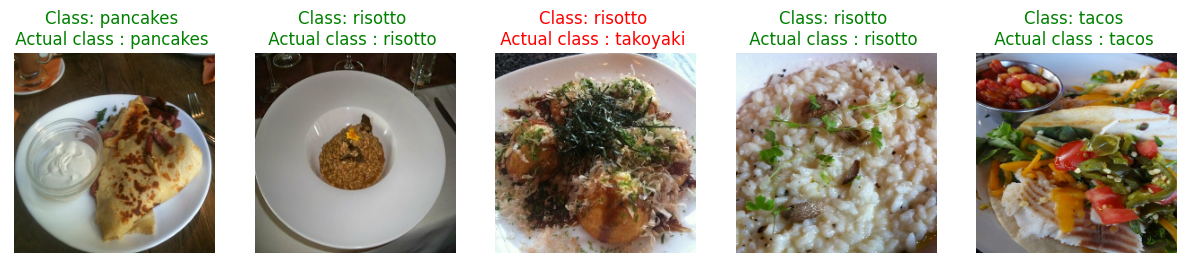

2025-02-17 14:43:22.369626: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
modelgraph.DisplayModelPredictions(model_0,test_11_dataset,class_names)

Let's try to evaluate the whole test dataset as we were doing just a fraction before to sped-up the validation proccess:

In [22]:
model_0.evaluate(test_11_dataset)

  1/104 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8125 - loss: 0.6238

104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.7779 - loss: 0.7953


[0.7902421355247498, 0.7839394211769104]

If we check the summary of the model_0, we can confirm that the efficientnet layer, which includes the whole original efficientnet model, has the parameters non-trainable as we stated. The only layer that is trainable is the output layer we added at the end for our own replicated model.

In [23]:
model_0.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 11)             │        14,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,961,587 (22.74 MB)

 Trainable params: 14,091 (55.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 28,184 (110.10 KB)

We have managed good results with this experiment using transfer learning. We can still try to run some other experiments and see if we can improve the accuracy.

Let's prepare a draft of different possibilities we can try to improve our model and then go one by one, comparing the results from different approaches.

## Draft a plan for testing different models.

Our base model has achieved Acc:[0.8013] and Loss:[ 0.7787] against our test 11 dataset. Other models we can still change and try to see how they perform could have these changes: 

 **Model iteration**      | **Model description**                                                                 |
|--------------------------|---------------------------------------------------------------------------------|
| **model_0**          | Base model build with Functional API that is based on efficientnetv2-b0, trained with `train_light_dataset` |
| **model_1**      |  `model_0` copy with an extra pre-layer used for data-augmentation, using the `train_ultralight_dataset` dataset |
| **model_2**      | `model_1` copy trained with `train_light_dataset`   |
| **model_3**      | `model_0` where the last block from efficientnetv2-b0 will be flagged **trainable**, trained with `train_light_dataset`   |
| **model_4**      | `model_3` copy trained with `train_11_dataset`   |


Let's go a bit through this draft to clarify what we are aiming for on each model: 

1. Model_0 is our baseline for this experiment where we managed Acc:[0.8013] and Loss:[ 0.7787]. This model was created with efficientnetv2-b0, where only an extra the output layer was added to be trained towards our light dataset `train_light_dataset` ( with an average of 75 image per class).

2. Model_1 will be trained with a more restricted dataset `train_ultralight_dataset`( an average of only 10 images per class) and it will be almost the same as Model_0, just that this time we will use a data augmentation layer after the input layer as this increases the training value of the dataset.

3. Model_2 will be an updated version of Model_1. We will use data augmentation but train with the `train_light_dataset`, so added to data augmentation, we should see an improved accuracy.

4. Model_3 will have some new changes, we will see how the efficientnetv2-b0 last layer changes if we would train them with our own dataset. So, this time we will train some more layers than the output layer. We will train the last 10 layers, and train it with the `train_light_dataset` dataset.

Let's then create this new dataset for the new test round : 

In [24]:
# Define directory path
training_ultralight_dir= "../Sources/Food-101-11-ultralight/train"
modelgraph.ImagesInDir(training_ultralight_dir)

 11 Directories and 0 images in '../Sources/Food-101-11-ultralight/train'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/hamburger'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/pancakes'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/oysters'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/risotto'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/tuna_tartare'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/tiramisu'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/sushi'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/steak'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/tacos'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/waffles'.
 0 Directories and 10 images in '../Sources/Food-101-11-ultralight/train/takoyaki'.


In [25]:
# Create datasets
train_ultralight_dataset = tf.keras.preprocessing.image_dataset_from_directory(training_light_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224),# resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

Found 825 files belonging to 11 classes.


Let's then create **model_1**, using again the app_model we created before to have its core structure but as we mentioned, adding a data augmentation layer.

In [26]:
from tensorflow.keras.layers import Rescaling,RandomFlip,RandomRotation,RandomZoom

data_augmented_layer_pack = tf.keras.models.Sequential([
     #Augmented feed
     RandomFlip("horizontal_and_vertical"),
     RandomZoom(0.2),
     RandomRotation(0.2)])

This is a very similar structure we used in our TF-CNN notebook. We will include this pack directly into our new model :

### Model_1 : Augmented layers, ultralight dataset

1. Create the model

In [27]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import Model

# Model_1 based on efficientnetv2b0, augmented data.

# Add in data augmentation Sequential model as a layer
x = data_augmented_layer_pack(inputs)

# Pass the augmented input to our efficientnet application layer, which is the core of our model
# (And without training the core model.)
x = app_model(x)

# Pool output features of base model
x = GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = Dense(len(class_names), activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = Model(inputs, outputs)

2. Compile the model

In [28]:
# 2. Compile the model

from tensorflow.keras.optimizers import Adam

model_1.compile(loss="categorical_crossentropy",
              optimizer= Adam(),
              metrics=["accuracy"])

3. Train the model

In [29]:
# 3.  Fit the model
# We have a reduced validation_steps to just validate a short part of the dataset,
# to speed up the process. We will observe the value for the whole prediction later on.
history_model_1 = model_1.fit(train_ultralight_dataset,
                    epochs=5,
                    steps_per_epoch=len(train_ultralight_dataset),
                    validation_data=test_11_dataset,
                    validation_steps=int(0.25* len(test_11_dataset)), 
                    )

Epoch 1/5


E0000 00:00:1739796232.204144     673 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_16_1/efficientnetv2-b0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 368ms/step - accuracy: 0.1935 - loss: 2.2954 - val_accuracy: 0.5505 - val_loss: 1.7251
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.5972 - loss: 1.5976 - val_accuracy: 0.6442 - val_loss: 1.3353
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.6861 - loss: 1.2640 - val_accuracy: 0.7091 - val_loss: 1.1275
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.7762 - loss: 1.0190 - val_accuracy: 0.7139 - val_loss: 1.0130
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.7532 - loss: 0.9570 - val_accuracy: 0.7368 - val_loss: 0.9440


We have achieved amazing results just for training our model with 10 images per dataset. The validation accuracy reaches up to 71% that, compared to [the original Random Forest model that was used for this dataset (58%)](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), it's already a great result.

These results of course have been improved over the years, and there have been along the way other state of the art models which already have gotten superior marks with comparable training rates. Also mind we are using a pre-existing model, so we are not starting here from square one.

In [30]:
model_1.evaluate(test_11_dataset)

104/104 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.7419 - loss: 0.9288


[0.9301698803901672, 0.7400000095367432]

for the next models, let's create a function we can reuse for creating these transfer learning models :

In [113]:
def CreateTransferLearningModel(trainable=False,TrainableLayers=0,class_number=11):
    ''' Creates a model using transfer learning model by introducing some defining parameters
    Args:
    Trainable: Determines if there are any layers trainable from the core model efficientnet.
    class_number: Number of classes expected for the output layer.
    Returns:
    model : keras.model prepared that needs to be compiled and fit.
    
    '''
    # Create application based model
    application_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    application_model.trainable = False

    # Setup n layersif trainable
    if trainable == True:
        print("These layers will be trainable now : ")
        for layer_number,layer in  enumerate(application_model.layers[-TrainableLayers:]):
            layer.trainable = True
            print(layer_number,layer.name, layer.trainable)

    # Setup model input and outputs with data augmentation built-in
    x = data_augmented_layer_pack(inputs)
    x = application_model(x)  # pass augmented images to base model but keep it in inference mode
    x = GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = Dense(units=class_number, activation="softmax", name="output_layer")(x)
    model = Model(inputs, outputs)

    return model

### Model_2 : Augmented layers, light dataset.

1.Create the model

In [32]:
model_2 = CreateTransferLearningModel()

2. Compile the model

In [33]:
model_2.compile(loss="categorical_crossentropy",
              optimizer= Adam(),
              metrics=["accuracy"])

3. Fit the model

In [34]:
history_model_2 = model_2.fit(train_light_dataset,
                    epochs=5,
                    steps_per_epoch=len(train_light_dataset),
                    validation_data=test_11_dataset,
                    validation_steps=int(0.25* len(test_11_dataset)), 
                    )

Epoch 1/5


E0000 00:00:1739796301.520726     673 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_17_1/efficientnetv2-b0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 426ms/step - accuracy: 0.2277 - loss: 2.2522 - val_accuracy: 0.5697 - val_loss: 1.6925
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.5653 - loss: 1.6055 - val_accuracy: 0.6466 - val_loss: 1.3099
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.6807 - loss: 1.2226 - val_accuracy: 0.6971 - val_loss: 1.1104
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.7082 - loss: 1.0794 - val_accuracy: 0.7127 - val_loss: 1.0110
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.7674 - loss: 0.8986 - val_accuracy: 0.7356 - val_loss: 0.9311


What is the actual result from a full validation against the test dataset ? 

In [35]:
model_2.evaluate(test_11_dataset)

  1/104 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.7500 - loss: 0.9392

104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.7350 - loss: 0.9193


[0.9222917556762695, 0.73575758934021]

Model_2 seems to be the greates so far. Having a look to its graphs, it seems the model has good curves for loss and training, seeing that is not overfitting and it goes slowly improving its results.

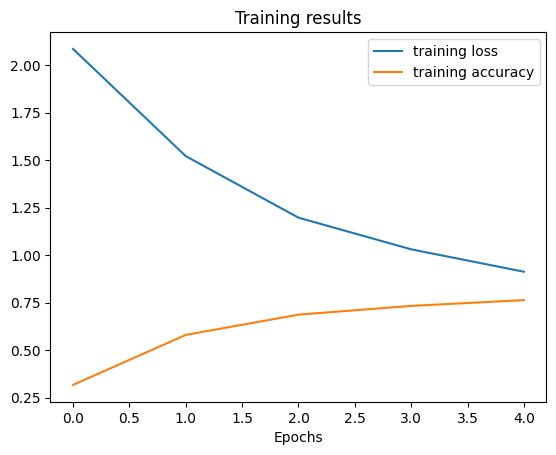

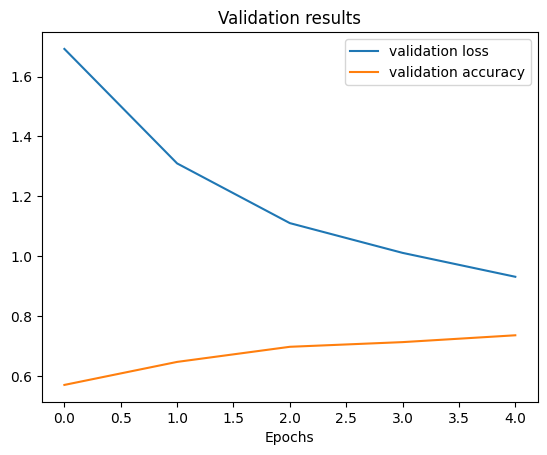

In [50]:
modelgraph.PlotAccuracyAndLoss(history_model_2)

We can see how comparing the three models we have worked on, suprisingly the one that has achieved the best result is the one with augmented layers and **the lowest amount of training data**.

Model_1 and Model_2 as we see in the graph below have similar validation accuracy, but the learning curve from model 2 seems better as on each epochs it achieves to increase its value.

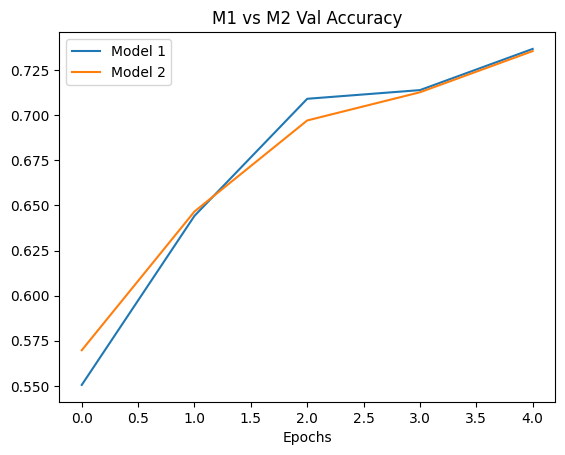

In [48]:
modelgraph.PlotAndCompareModels(history_model_1,history_model_2,model1_name="Model 1"
                     ,model2_name="Model 2",comparison="val_accuracy",title="M1 vs M2 Val Accuracy")

In [ ]:
modelgraph.PlotAndCompareModels(history_model_0,history_model_2,model1_name="Model 0"
                     ,model2_name="Model 2",comparison="val_accuracy",title="M0 vs M2 Val Accuracy")

### Model_3:  Training the last 10 layers from our efficientnet application layer

Our application layer, which is actually the efficientnet model converted into a single layer, has been the core model we have been using in these experiments. So far we have kept the trainable flag false, but for this model we will change that by training the last block, which consist in the last 17 layers. We will start with the first last 10 layers, and then extend to the whole block ( the total of 17 layers).

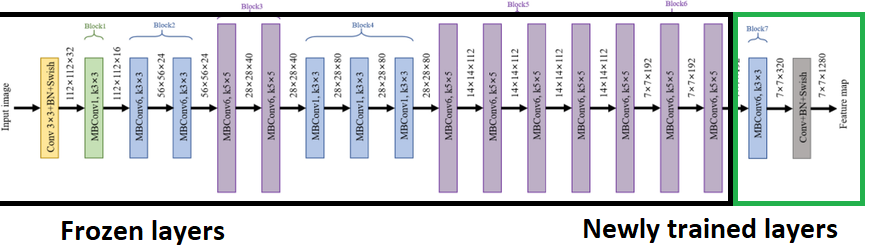

In [152]:
# 1. Create the model

Last10Layers = 10
model_3 = CreateTransferLearningModel(True,Last10Layers)

These layers will be trainable now : 
0 block6h_se_reduce True
1 block6h_se_expand True
2 block6h_se_excite True
3 block6h_project_conv True
4 block6h_project_bn True
5 block6h_drop True
6 block6h_add True
7 top_conv True
8 top_bn True
9 top_activation True


Let's compare with our complete model summary the difference between the training parameters we have from our new partly trainable efficienetnet model compare to the ones before that were fully frozen (non-trainable, weights adjusted as they were trained when fetching the model)

In [153]:
model_3.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 11)             │        14,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,933,403 (22.63 MB)

 Trainable params: 595,771 (2.27 MB)

 Non-trainable params: 5,337,632 (20.36 MB)

In [154]:
model_2.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 11)             │        14,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,961,587 (22.74 MB)

 Trainable params: 14,091 (55.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 28,184 (110.10 KB)

We can see as we have almost 600k parameters to train now. Let's see what the difference will be. As we can imagine, this model will probably perform better once we feed it a greater dataset and also if we train it for longer epochs.

Something we could add for these models is a [checkpoint callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint), where we can store the weights at a given epoch so we can continue the training at a later point. Let's add the callback and then compile and fit the model! :)

In [121]:

# Setup checkpoint path
checkpoint_path = "/tmp/ckpt/checkpoints/checkpoint.model.weights.h5" 

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

2. Compile the model

When compiling now, we will play a bit with the learning rate as we don't want to swing too much the pretrained weights abruptly. This [fine-tuning](https://arxiv.org/abs/1801.06146) paper advices to not modify to many layers when doing this procedure and also mind the learning rate, so we will follow this path.

In [155]:
# 2. Compile the model
model_3.compile(loss="categorical_crossentropy",
              optimizer= Adam(learning_rate=0.0001),
              metrics=["accuracy"])

3. Fit the model

In [156]:
# 3. Fit the model
history_model_3 = model_3.fit(train_light_dataset,
                                            epochs=5,
                                            validation_data=test_11_dataset,
                                            validation_steps=int(0.25 * len(test_11_dataset)),
                                            callbacks=[checkpoint_callback]) # name experiment appropriately
     

Epoch 1/5


E0000 00:00:1739805197.739694     673 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_34_1/efficientnetv2-b0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.1370 - loss: 2.3735
Epoch 1: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 424ms/step - accuracy: 0.1386 - loss: 2.3717 - val_accuracy: 0.3029 - val_loss: 2.1921
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3144 - loss: 2.1523
Epoch 2: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.3161 - loss: 2.1507 - val_accuracy: 0.4772 - val_loss: 1.9874
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.4400 - loss: 1.9658
Epoch 3: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.4420 - loss: 1.9636 - val_accuracy: 0.5589 - val_loss: 1.8010
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5559 - loss: 1.7735
Epoch 4: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.5562 - loss: 1.7722 - val_accuracy: 0.6310 - val_loss: 1.5829
Epoch 5/5
26/

We can now adjust and fine-tune some more layers as we have edited partialy some of then and see how it progress. This experiment would have greater success with more epochs and larger data, but we will check on that on the last experiment layer. For now, let's edit some of the trainable layers to extend it to the whole block:

In [157]:

# Access the application_model layers of model_3
model_3_application_model = model_3.layers[2]
model_3_application_model.name

'efficientnetv2-b0'

Let's turn the last 17 layers to trainable.

In [167]:
for layer_number,layer in  enumerate(model_3_application_model.layers[-17:]):
    layer.trainable=True

Let's confirm only until the 17 layer are trainable now.

In [168]:
for layer_number,layer in  enumerate(model_3_application_model.layers[-22:]):
    print(layer.name, layer.trainable)

block6g_project_conv False
block6g_project_bn False
block6g_drop True
block6g_add True
block6h_expand_conv True
block6h_expand_bn True
block6h_expand_activation True
block6h_dwconv2 True
block6h_bn True
block6h_activation True
block6h_se_squeeze True
block6h_se_reshape True
block6h_se_reduce True
block6h_se_expand True
block6h_se_excite True
block6h_project_conv True
block6h_project_bn True
block6h_drop True
block6h_add True
top_conv True
top_bn True
top_activation True


Now, let's continue another training and see how it progresses.

In [169]:
# Fine tune for another 5 epochs
fine_tune_epochs = 10

# Refit the model (same as model_2 except with more trainable layers)
history_model_3_ft = model_3.fit(train_light_dataset,
                                        epochs=10,
                                        validation_data=test_11_dataset,
                                        initial_epoch=history_model_3.epoch[-1], # start from previous last epoch
                                        validation_steps=int(0.25*len(test_11_dataset)),
                                        callbacks=checkpoint_callback)

Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.6995 - loss: 1.4360
Epoch 5: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.6989 - loss: 1.4362 - val_accuracy: 0.6875 - val_loss: 1.2794
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.7246 - loss: 1.3321
Epoch 6: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.7234 - loss: 1.3325 - val_accuracy: 0.6995 - val_loss: 1.1698
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6928 - loss: 1.2723
Epoch 7: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 338ms/step - accuracy: 0.6935 - loss: 1.2718 - val_accuracy: 0.6935 - val_loss: 1.1124
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7246 - loss: 1.1702
Epoch 8: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step - accuracy: 0.7250 - loss: 1.1696 - val_accuracy: 0.7188 - val_loss: 1.0297


For comparison, let's make a model_3_2 with less trainable layers and quickly run a similar test, **without fine tuning.**

In [170]:
# 1. Create the model

model_3_2 = CreateTransferLearningModel(True,Last10Layers)

# 2. Compile de model

model_3_2.compile(loss="categorical_crossentropy",
              optimizer= Adam(learning_rate=0.0001),
              metrics=["accuracy"])

# 3. Fit the model
history_model_3_2 = model_3_2.fit(train_light_dataset,
                                            epochs=5,
                                            validation_data=test_11_dataset,
                                            validation_steps=int(0.25 * len(test_11_dataset)),
                                            callbacks=[checkpoint_callback]) # name experiment appropriately

These layers will be trainable now : 
0 block6h_se_reduce True
1 block6h_se_expand True
2 block6h_se_excite True
3 block6h_project_conv True
4 block6h_project_bn True
5 block6h_drop True
6 block6h_add True
7 top_conv True
8 top_bn True
9 top_activation True
Epoch 1/5


E0000 00:00:1739805878.753724     673 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_35_1/efficientnetv2-b0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.1370 - loss: 2.3759
Epoch 1: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 409ms/step - accuracy: 0.1390 - loss: 2.3741 - val_accuracy: 0.3510 - val_loss: 2.1459
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.3609 - loss: 2.1165
Epoch 2: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.3616 - loss: 2.1156 - val_accuracy: 0.5192 - val_loss: 1.9263
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5016 - loss: 1.9019
Epoch 3: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.5016 - loss: 1.9015 - val_accuracy: 0.6214 - val_loss: 1.7145
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6048 - loss: 1.7274
Epoch 4: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - accuracy: 0.6041 - loss: 1.7267 - val_accuracy: 0.6587 - val_loss: 1.5297
Epoch 5/5
26/

Let's try to extend the training a bit longer and se enow for this, how its history progresses.

In [171]:
# Refit the model (same as model_2 except with more trainable layers)
history_model_3_2_extended = model_3_2.fit(train_light_dataset,
                                        epochs=fine_tune_epochs,
                                        validation_data=test_11_dataset,
                                        initial_epoch=history_model_3_2.epoch[-1], # start from previous last epoch
                                        validation_steps=int(0.25*len(test_11_dataset)),
                                        callbacks=checkpoint_callback)

Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.6586 - loss: 1.4649
Epoch 5: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 394ms/step - accuracy: 0.6590 - loss: 1.4641 - val_accuracy: 0.7043 - val_loss: 1.2617
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.6841 - loss: 1.3594
Epoch 6: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.6839 - loss: 1.3590 - val_accuracy: 0.7079 - val_loss: 1.1545
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7197 - loss: 1.2648
Epoch 7: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 417ms/step - accuracy: 0.7195 - loss: 1.2641 - val_accuracy: 0.7320 - val_loss: 1.0742
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.7370 - loss: 1.1796
Epoch 8: val_loss did not improve from 0.92157
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 433ms/step - accuracy: 0.7372 - loss: 1.1784 - val_accuracy: 0.7272 - val_loss: 1.02

How do the standart trainable (model_3_2) and the fine tuned model evaluate (model_3) ?

In [172]:
model_3.evaluate(test_11_dataset)

104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 181ms/step - accuracy: 0.7407 - loss: 0.9297


[0.9341589212417603, 0.7321212291717529]

In [173]:
model_3_2.evaluate(test_11_dataset)

104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.7384 - loss: 0.9288


[0.9213884472846985, 0.746666669845581]

Seems our fine-tuned model has performed slightly better ! But againt, with more epochs and a larger dataset, this could have greater results.

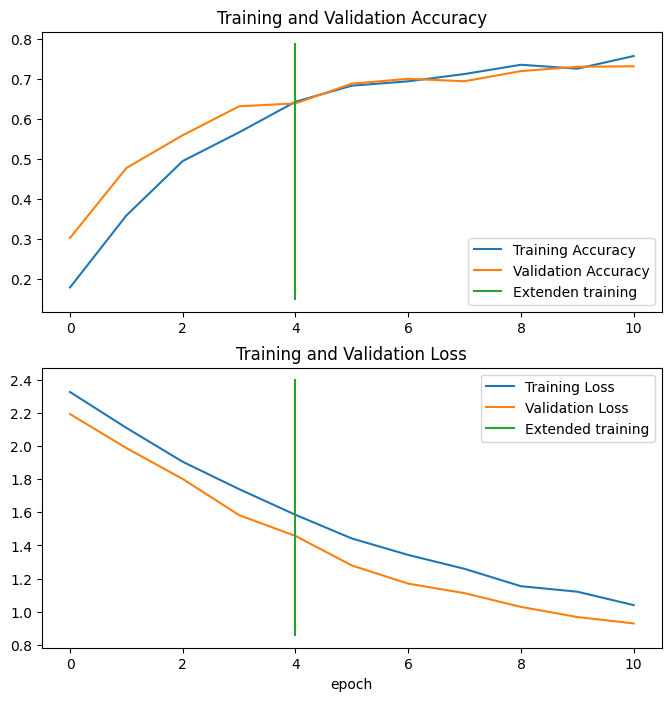

In [178]:
modelgraph.PlotAccuracyAndLossExtended(history_model_3,history_model_3_ft,5)

Let's see the evolution of the extended training without fine-tuning.

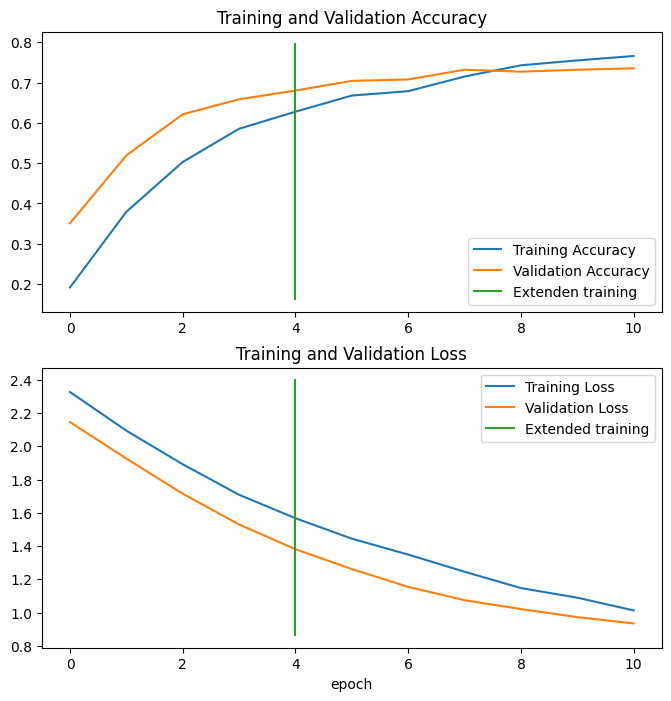

In [179]:
modelgraph.PlotAccuracyAndLossExtended(history_model_3_2,history_model_3_2_extended,5)

As both seem to be good results, let's jump into the last part of this notebook now and go to the model_4.

### Model_4 : Model 3 copy trained with a greater dataset.

Having a greater training dataset should help build a more consistent model. Let's train it and compare with the model 3 to see the differences in validation accuracy and loss.

In [184]:
# 1. Create the model

model_4 = CreateTransferLearningModel(False)

# 2. Compile de model

model_4.compile(loss="categorical_crossentropy",
              optimizer= Adam(learning_rate=0.0001),
              metrics=["accuracy"])

# 3. Fit the model
history_model_4 = model_4.fit(train_11_dataset,
                                            epochs=5,
                                            validation_data=test_11_dataset,
                                            validation_steps=int(0.25 * len(test_11_dataset)),
                                            callbacks=[checkpoint_callback]) # name experiment appropriately

Epoch 1/5


E0000 00:00:1739807682.887988     673 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_37_1/efficientnetv2-b0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.2163 - loss: 2.2615
Epoch 1: val_loss did not improve from 0.52311
241/241 ━━━━━━━━━━━━━━━━━━━━ 58s 138ms/step - accuracy: 0.2167 - loss: 2.2608 - val_accuracy: 0.5421 - val_loss: 1.7644
Epoch 2/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.5552 - loss: 1.7079
Epoch 2: val_loss did not improve from 0.52311
241/241 ━━━━━━━━━━━━━━━━━━━━ 51s 214ms/step - accuracy: 0.5554 - loss: 1.7076 - val_accuracy: 0.6635 - val_loss: 1.3904
Epoch 3/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.6420 - loss: 1.4014
Epoch 3: val_loss did not improve from 0.52311
241/241 ━━━━━━━━━━━━━━━━━━━━ 60s 250ms/step - accuracy: 0.6420 - loss: 1.4012 - val_accuracy: 0.7163 - val_loss: 1.1627
Epoch 4/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.6786 - loss: 1.2289
Epoch 4: val_loss did not improve from 0.52311
241/241 ━━━━━━━━━━━━━━━━━━━━ 56s 231ms/step - accuracy: 0.6786 - loss: 1.2288 - val_accuracy: 0.7500 - val_loss: 1

We can appreciate some differences when we compare the model 3 and model 4. Model 4 has as greater dataset, and as we can see that improves the base result in great values. A downside of model 4 though is the lenght of the trainings : we have a greater dataset that makes the training extensively longer.

There is a compromise we follow with training time and efficiency : Is the extra time used for training valuable and worth for the effectiveness we gain in the accuracy ?

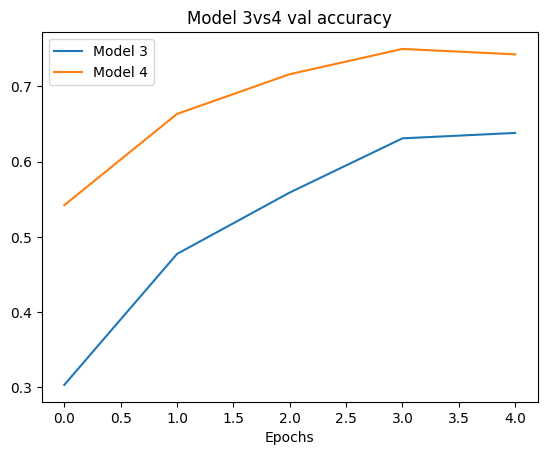

In [ ]:
modelgraph.
PlotAndCompareModels(history_model_3,history_model_4,model1_name="Model 3"
                     ,model2_name="Model 4",comparison="val_accuracy",
                     title="Model 3vs4 val accuracy")

Let's prepare and do also some fine-tuning as we did before but with Model 4.

In [186]:
# Access the application_model layers of model_4
model_4_application_model = model_4.layers[2]

for layer_number,layer in  enumerate(model_4_application_model.layers[-17:]):
    layer.trainable=True
    print(layer.name, layer.trainable)

block6h_expand_bn True
block6h_expand_activation True
block6h_dwconv2 True
block6h_bn True
block6h_activation True
block6h_se_squeeze True
block6h_se_reshape True
block6h_se_reduce True
block6h_se_expand True
block6h_se_excite True
block6h_project_conv True
block6h_project_bn True
block6h_drop True
block6h_add True
top_conv True
top_bn True
top_activation True


In [187]:
# Fine tune for another 5 epochs
fine_tune_epochs = 10

# Refit the model (same as model_2 except with more trainable layers)
history_model_4_ft = model_4.fit(train_11_dataset,
                                        epochs=10,
                                        validation_data=test_11_dataset,
                                        initial_epoch=history_model_4.epoch[-1], # start from previous last epoch
                                        validation_steps=int(0.25*len(test_11_dataset)),
                                        callbacks=checkpoint_callback)

Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7192 - loss: 1.0290
Epoch 5: val_loss did not improve from 0.52311
241/241 ━━━━━━━━━━━━━━━━━━━━ 38s 155ms/step - accuracy: 0.7192 - loss: 1.0289 - val_accuracy: 0.7572 - val_loss: 0.8844
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.7274 - loss: 0.9712
Epoch 6: val_loss did not improve from 0.52311
241/241 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - accuracy: 0.7274 - loss: 0.9712 - val_accuracy: 0.7788 - val_loss: 0.8267
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.7435 - loss: 0.9263
Epoch 7: val_loss did not improve from 0.52311
241/241 ━━━━━━━━━━━━━━━━━━━━ 51s 210ms/step - accuracy: 0.7435 - loss: 0.9263 - val_accuracy: 0.7837 - val_loss: 0.7881
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7421 - loss: 0.8901
Epoch 8: val_loss did not improve from 0.52311
241/241 ━━━━━━━━━━━━━━━━━━━━ 76s 315ms/step - accuracy: 0.7421 - loss: 0.8901 - val_accuracy: 0.7885

This training took a long time! let's compare the fine tuning models we have used. The curves for Model 4 seem positive and we can see how compared to the model 3, the loss curves are mantaining its value towards the end, meaning that we could be starting to overfit in our experiments for Model 4.

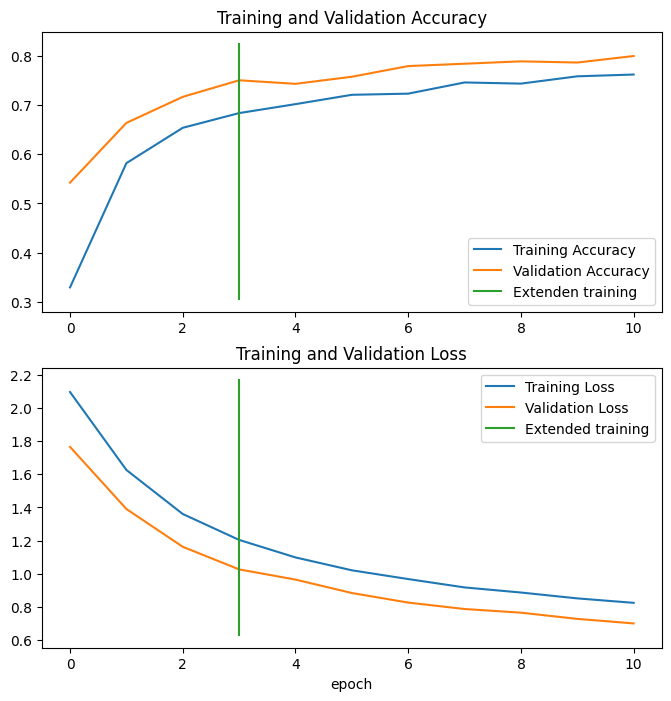

In [208]:
modelgraph.PlotAccuracyAndLossExtended(history_model_4,history_model_4_ft,4)

In [205]:
history_4_total = history_model_4.history["val_accuracy"]+ history_model_4_ft.history["val_accuracy"]
history_3_total = history_model_3.history["val_accuracy"]+ history_model_3_ft.history["val_accuracy"]
history_3_2_total = history_model_3_2.history["val_accuracy"]+ history_model_3_2_extended.history["val_accuracy"]

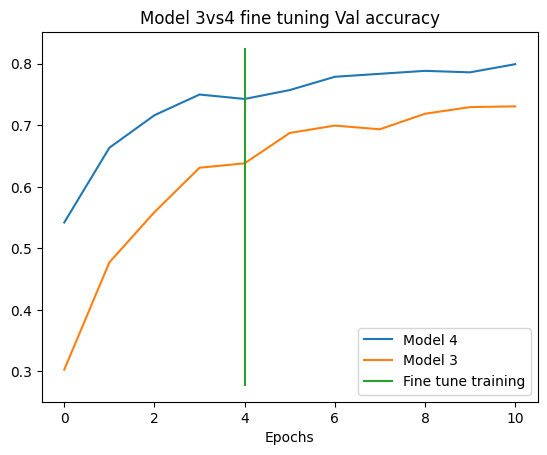

In [204]:
modelgraph.PlotAndCompareModelsFT(history_4_total,history_3_total,model1_name="Model 4"
                     ,model2_name="Model 3",
                     title="Model 3vs4 fine tuning Val accuracy",finetune=5)

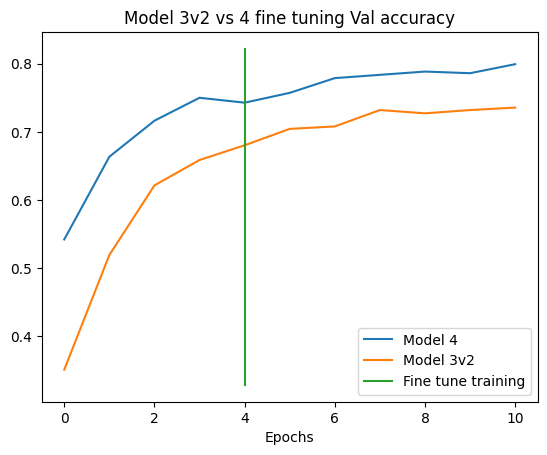

In [207]:
modelgraph.PlotAndCompareModelsFT(history_4_total,history_3_2_total,model1_name="Model 4"
                     ,model2_name="Model 3v2",
                     title="Model 3v2 vs 4 fine tuning Val accuracy",finetune=5)

We have seen different aspects on these experiments about how we can tune and specify different learning paths when using transfer learning. As training took long time for Model 4, let's save our model and continue on a different experiment soon.

### Saving our model

In [209]:
model_4.save('saved_models/model_4_EfficientNetV2B0.keras')